In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob  # For sentiment analysis (if not already done)

# Load the CSV file
df = pd.read_csv("../data/thematic_analysis_output.csv")

# Check data structure
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with missing reviews (if any)
df = df.dropna(subset=['review'])

# Standardize bank names (example)
df['bank'] = df['bank'].str.upper().str.strip()  # Ensure consistency (e.g., "CBE" vs "cbe")

                                              review  rating        date  \
0  really am happy to this app it is Siple to use...       5  2025-06-07   
1  I liked this app. But the User interface is ve...       2  2025-06-07   
2  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
3                        what is this app problem???       1  2025-06-05   
4       the app is proactive and a good connections.       5  2025-06-05   

                          bank       source  \
0  Commercial Bank of Ethiopia  Google Play   
1  Commercial Bank of Ethiopia  Google Play   
2  Commercial Bank of Ethiopia  Google Play   
3  Commercial Bank of Ethiopia  Google Play   
4  Commercial Bank of Ethiopia  Google Play   

                                            keywords               themes  
0          ['happy', 'use', 'app', 'ድሮ', 'abamecha']    ['Miscellaneous']  
1  ['basic', 'attractive', 'interface', 'user', '...  ['User Experience']  
2  ['account', 'nigeria', 'kenya

In [2]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity  # Range: -1 (negative) to +1 (positive)

df['sentiment_score'] = df['review'].apply(get_sentiment)

# Classify sentiment (optional)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [3]:
# Group by bank and aggregate metrics
bank_stats = df.groupby('bank').agg({
    'rating': 'mean',
    'sentiment_score': 'mean',
    'review': 'count'
}).rename(columns={'review': 'review_count'})

print("Bank Performance Summary:")
print(bank_stats.sort_values('sentiment_score', ascending=False))

# Top themes for each bank
for bank in df['bank'].unique():
    print(f"\nTop Themes for {bank}:")
    print(df[df['bank'] == bank]['themes'].value_counts().head(3))

Bank Performance Summary:
                               rating  sentiment_score  review_count
bank                                                                
DASHEN BANK                  4.385445         0.327231           371
COMMERCIAL BANK OF ETHIOPIA  4.085106         0.312566           376
BANK OF ABYSSINIA            2.542416         0.027911           389

Top Themes for COMMERCIAL BANK OF ETHIOPIA:
themes
['Miscellaneous']              359
['Transaction Performance']      5
['Customer Support']             4
Name: count, dtype: int64

Top Themes for BANK OF ABYSSINIA:
themes
['Miscellaneous']      362
['App Reliability']      8
['Account Access']       7
Name: count, dtype: int64

Top Themes for DASHEN BANK:
themes
['Miscellaneous']      347
['Feature Request']      8
['User Experience']      7
Name: count, dtype: int64


C:\Users\fre\AppData\Local\Temp\ipykernel_2116\1621098032.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bank', y='rating', data=df, ci=None)


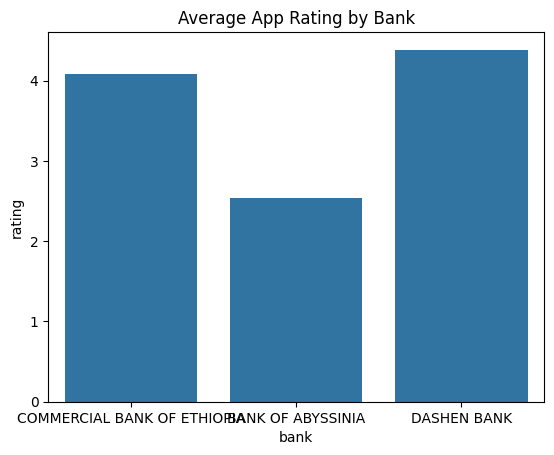

In [4]:
# Compare average ratings
sns.barplot(x='bank', y='rating', data=df, ci=None)
plt.title("Average App Rating by Bank")
plt.show()

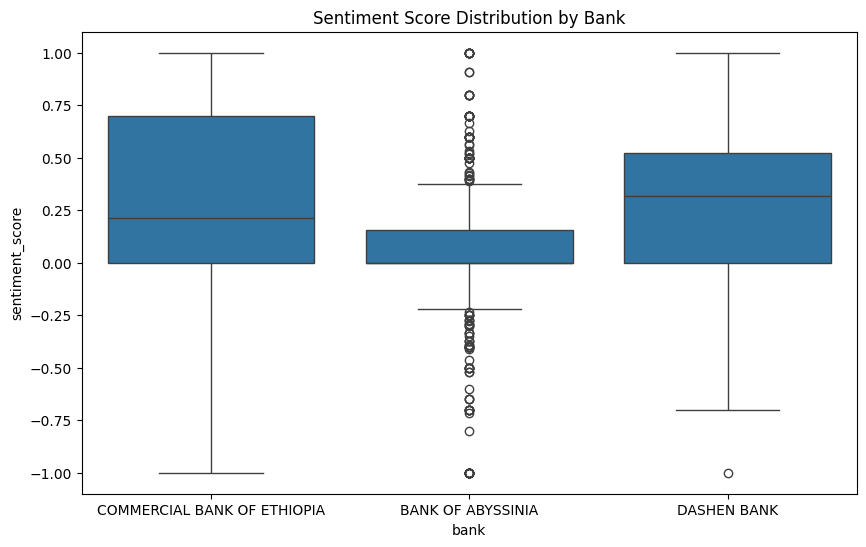

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bank', y='sentiment_score', data=df)
plt.title("Sentiment Score Distribution by Bank")
plt.show()

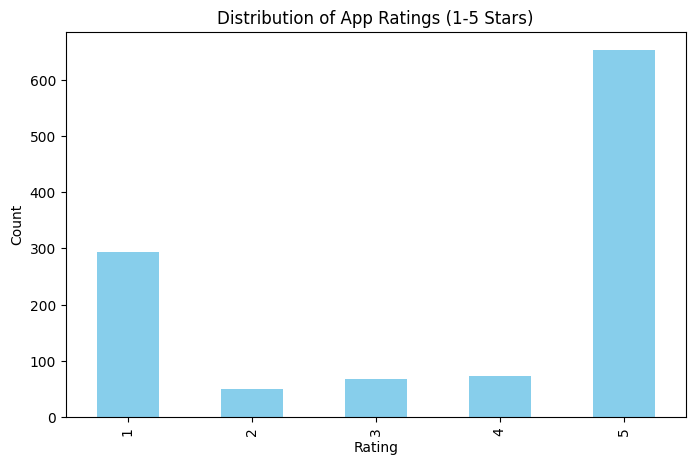

In [6]:
plt.figure(figsize=(8, 5))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of App Ratings (1-5 Stars)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

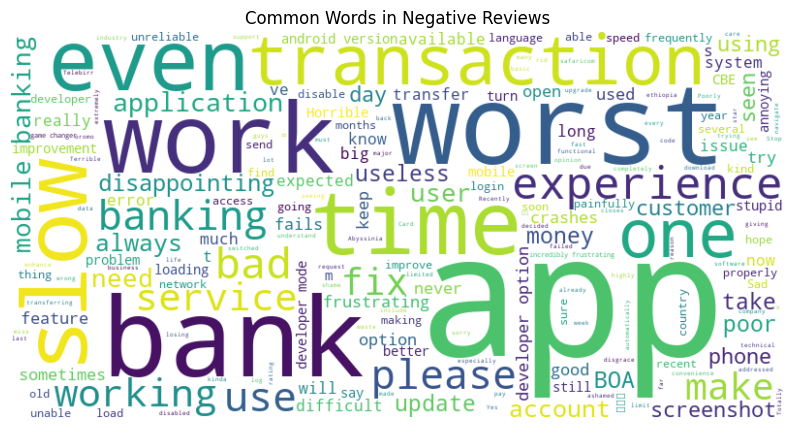

In [7]:
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Negative Reviews")
plt.show()

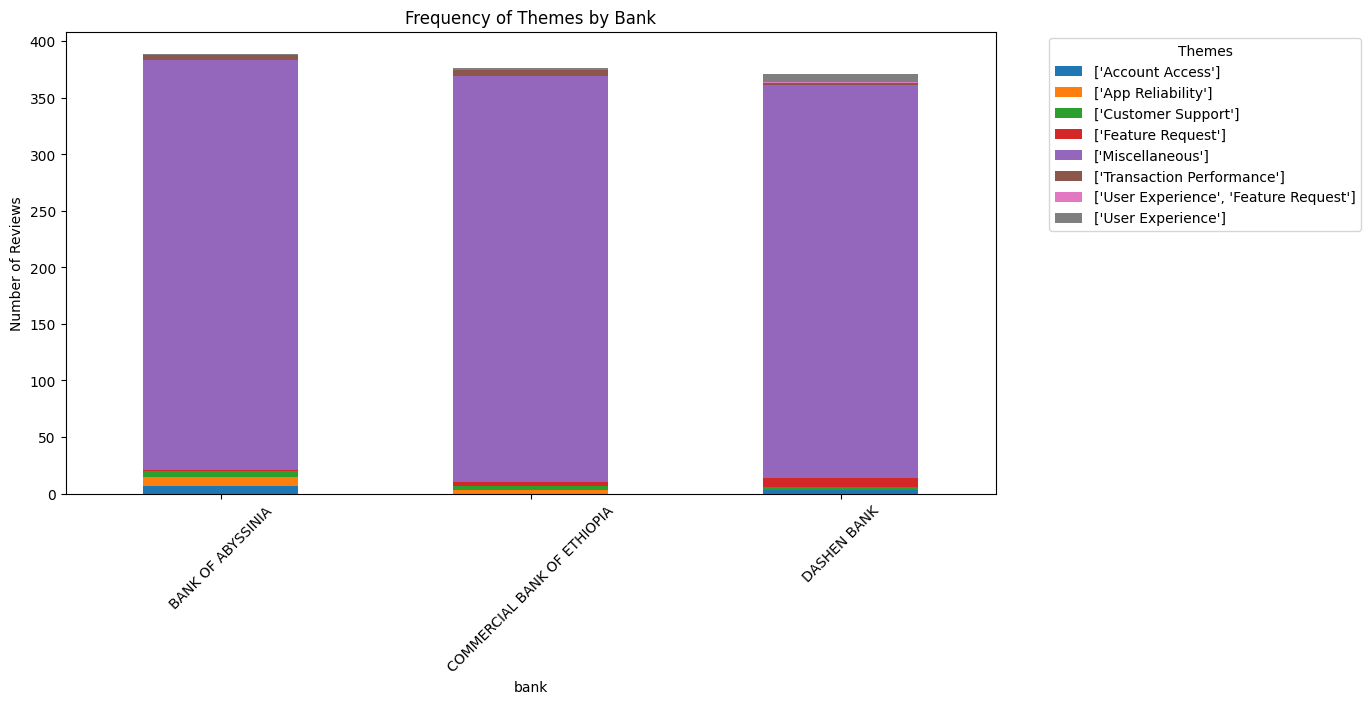

In [8]:
theme_counts = df.groupby(['bank', 'themes']).size().unstack().fillna(0)
theme_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Frequency of Themes by Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Themes", bbox_to_anchor=(1.05, 1))
plt.show()